In [47]:
!pip install pandas, numpy, glob, os, matplotlib, seaborn

ERROR: Invalid requirement: 'pandas,'


In [48]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Define the path and get all CSV files
path = "../datas/Data Coaching Fitbit/"
files = glob.glob(os.path.join(path, "*.csv"))

In [50]:
# List to store data from all CSVs
dfs = []

# Read all CSV files
for file in files:
    df = pd.read_csv(file)
    
    # Convert 'date' column to datetime
    df['date'] = pd.to_datetime(df['date'])
    
    # Keep only weekdays (Monday to Friday)
    df = df[df['date'].dt.weekday < 5]
    
    # Keep only records before 18:00
    df = df[df['date'].dt.hour < 18]

    # Append the cleaned data
    dfs.append(df)

In [51]:
# Concatenate all data
df = pd.concat(dfs, ignore_index=True)

In [52]:
# Compute individual means for steps
individual_means = df.groupby(['treatment_id', df['date'].dt.date])['steps'].mean().reset_index()

In [53]:
# Convert 'date' back to datetime format
individual_means['date'] = pd.to_datetime(individual_means['date'])

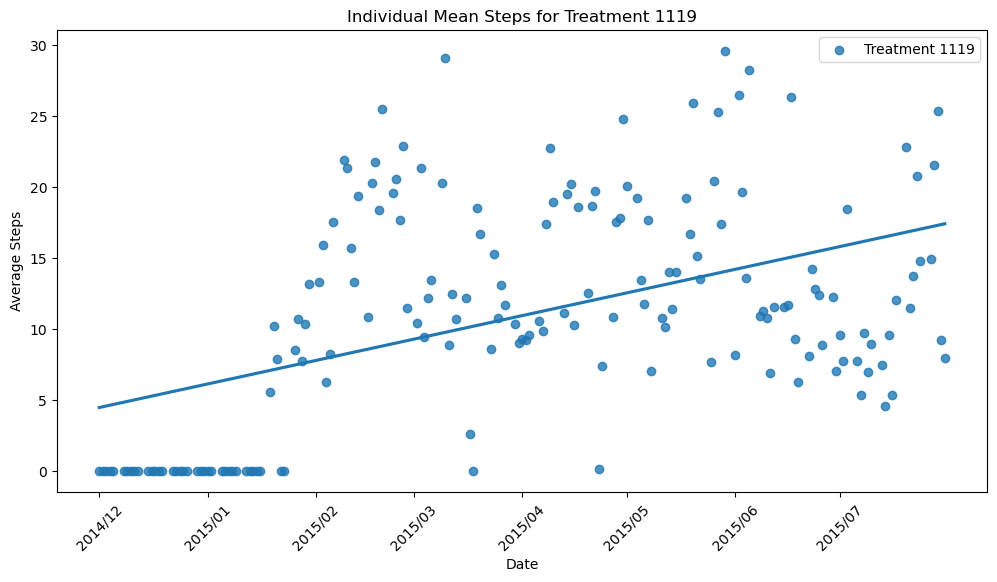

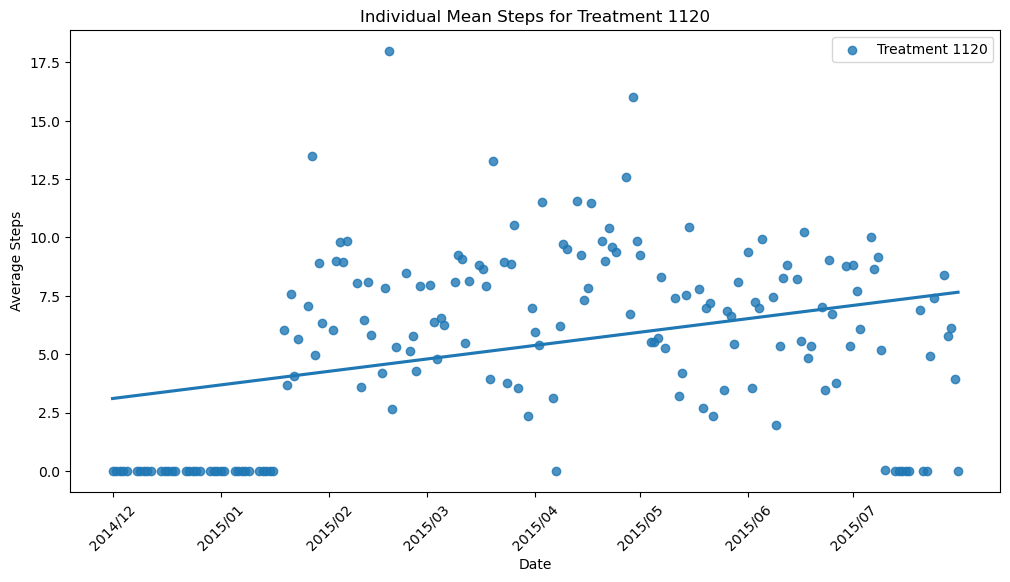

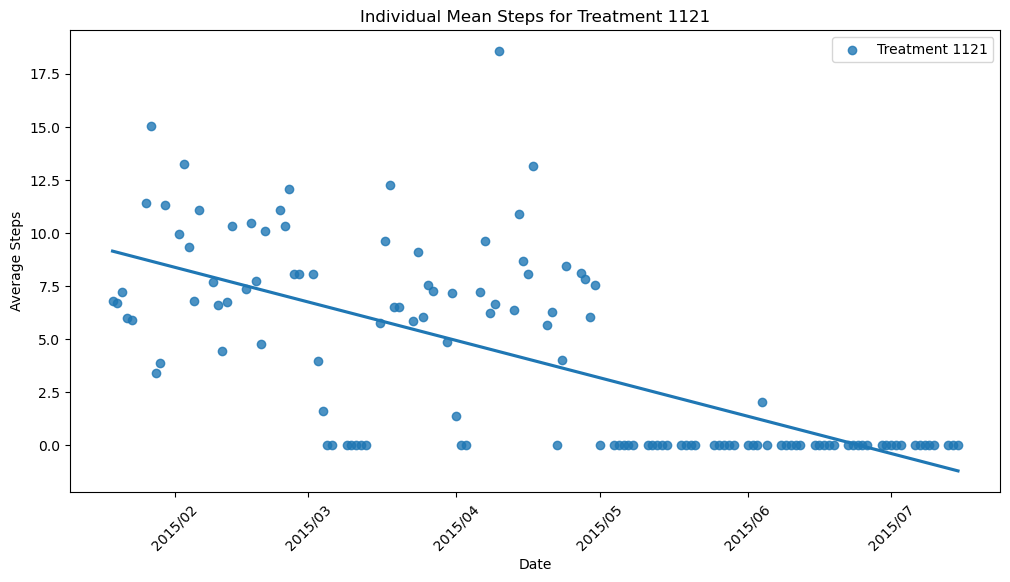

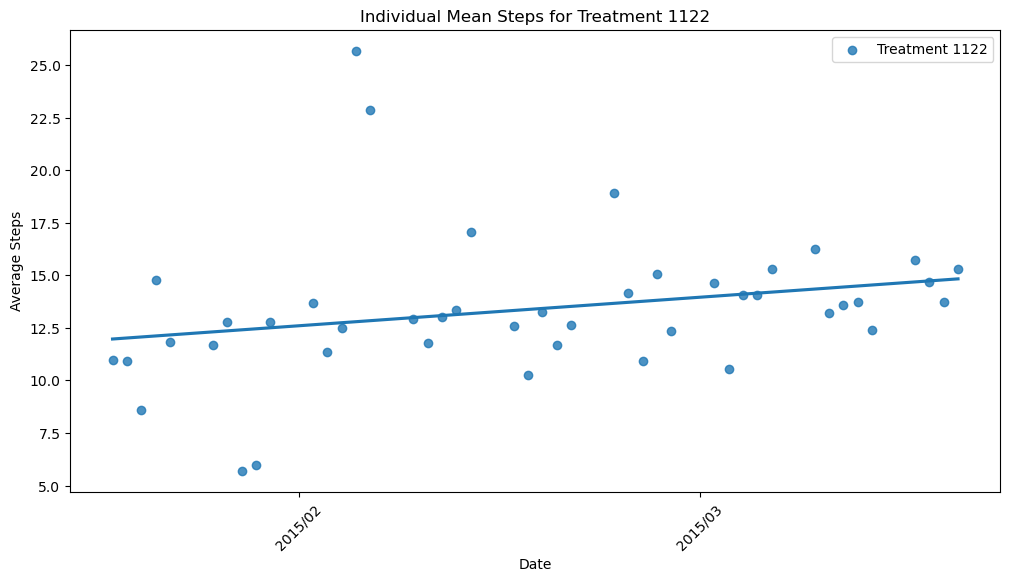

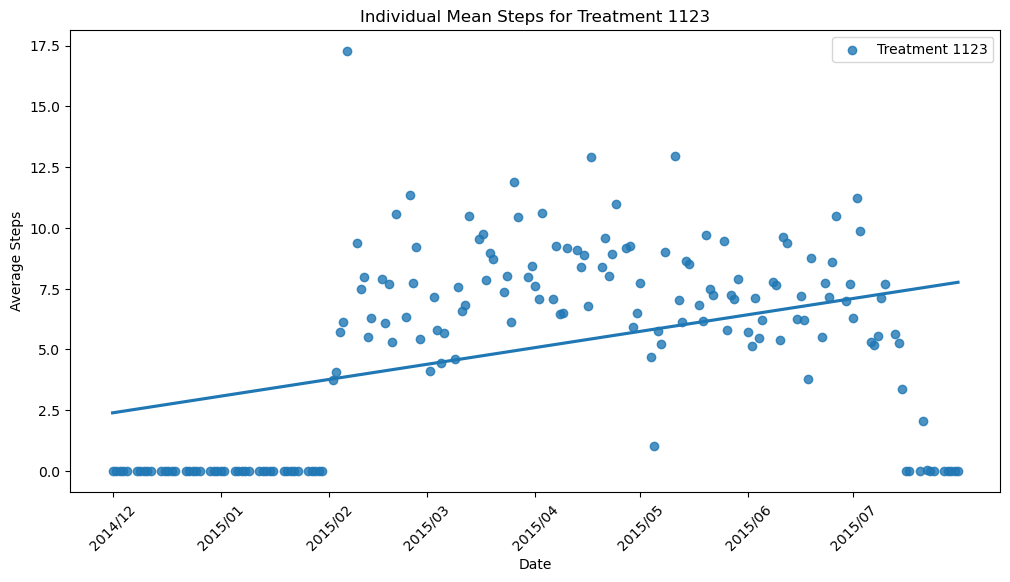

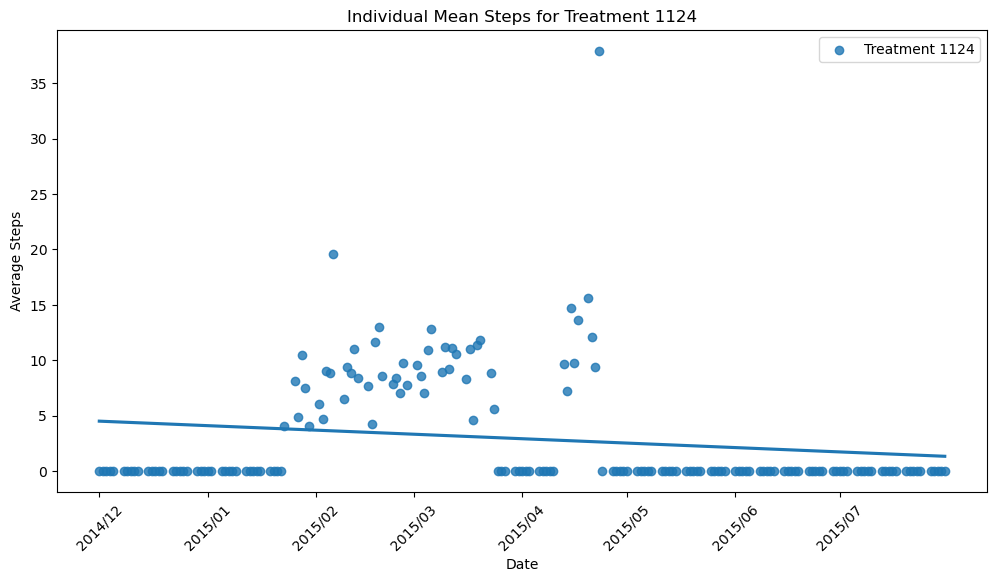

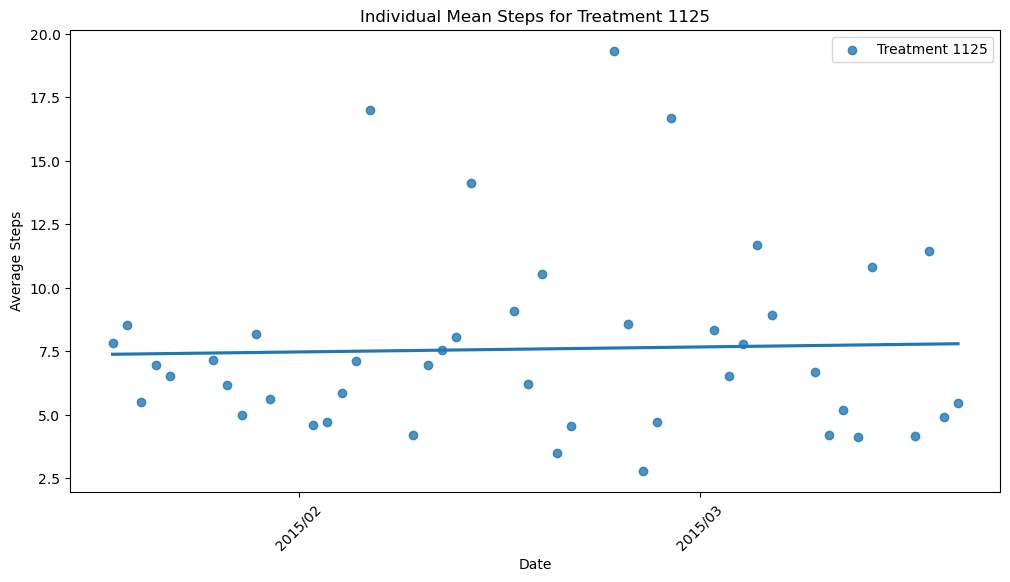

In [63]:
# -------- PLOT 1: Individual plots per `treatment_id` --------
treatment_ids = individual_means['treatment_id'].unique()

for treatment in treatment_ids:
    plt.figure(figsize=(12, 6))
    
    # Filter data for the current treatment_id
    subset = individual_means[individual_means['treatment_id'] == treatment].copy()  # Use .copy() here
    
    # Convert 'date' to numeric for regression (safe modification)
    subset.loc[:, 'date_numeric'] = (subset['date'] - subset['date'].min()).dt.days
    
    # Plot regression for this individual
    sns.regplot(data=subset, x='date_numeric', y='steps', scatter=True, ci=None, label=f'Treatment {treatment}')
    
    # Set the x-ticks to the first day of each month (same as Plot 2)
    months = pd.date_range(start=subset['date'].min(), end=subset['date'].max(), freq='MS')  # First day of each month
    month_numeric = (months - subset['date'].min()).days  # Convert the months to numeric
    
    # Apply the same x-tick formatting as in Plot 2 (YYYY/MM format)
    plt.xticks(month_numeric, months.strftime('%Y/%m'), rotation=45)  # Format x-ticks as YYYY/MM and rotate for better readability
    
    # Formatting
    plt.title(f"Individual Mean Steps for Treatment {treatment}")
    plt.xlabel("Date")
    plt.ylabel("Average Steps")
    plt.legend()
    plt.show()

Average number of steps: 5.67


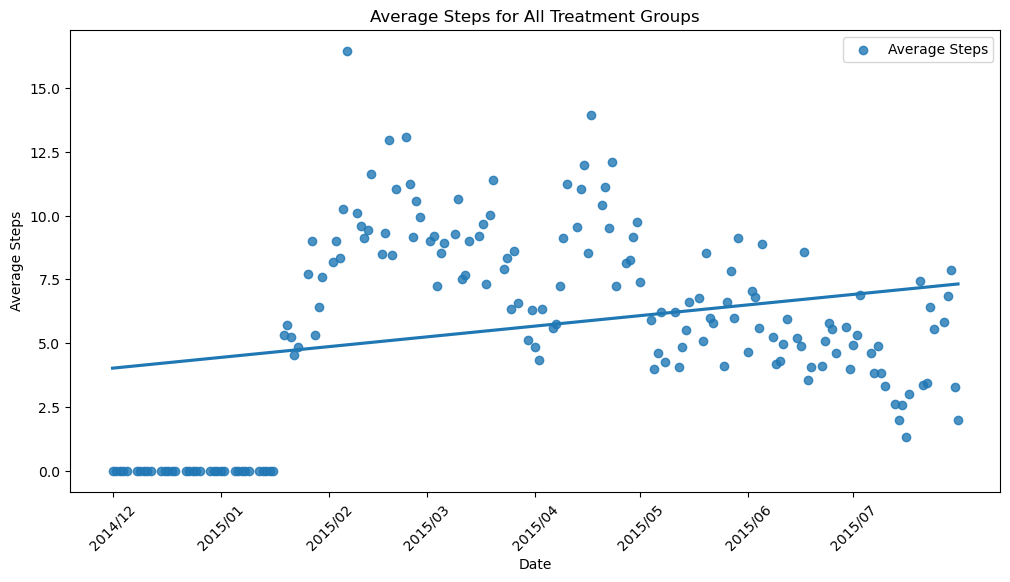

In [72]:
# -------- PLOT 2: Average steps for all treatment_ids --------

# Compute the average of all individuals' steps per day
average_steps = df.groupby([df['date'].dt.date])['steps'].mean().reset_index()

# Convert 'date' back to datetime format
average_steps['date'] = pd.to_datetime(average_steps['date'])

# Calculate and print the average number of steps
overall_avg_steps = average_steps['steps'].mean()
print(f"Average number of steps: {overall_avg_steps:.2f}")

# Plot the average steps for all treatment_ids
plt.figure(figsize=(12, 6))

# Convert 'date' to numeric for regression (safe modification)
average_steps['date_numeric'] = (average_steps['date'] - average_steps['date'].min()).dt.days

# Plot the regression for the average steps
sns.regplot(data=average_steps, x='date_numeric', y='steps', scatter=True, ci=None, label='Average Steps')

# Set the x-ticks to the first day of each month (same as Plot 1)
months = pd.date_range(start=average_steps['date'].min(), end=average_steps['date'].max(), freq='MS')  # First day of each month
month_numeric = (months - average_steps['date'].min()).days  # Convert the months to numeric

# Apply the same x-tick formatting as in Plot 1 (YYYY/MM format)
plt.xticks(month_numeric, months.strftime('%Y/%m'), rotation=45)  # Format x-ticks as YYYY/MM and rotate for better readability

# Formatting
plt.title("Average Steps for All Treatment Groups")
plt.xlabel("Date")
plt.ylabel("Average Steps")
plt.legend()
plt.show()

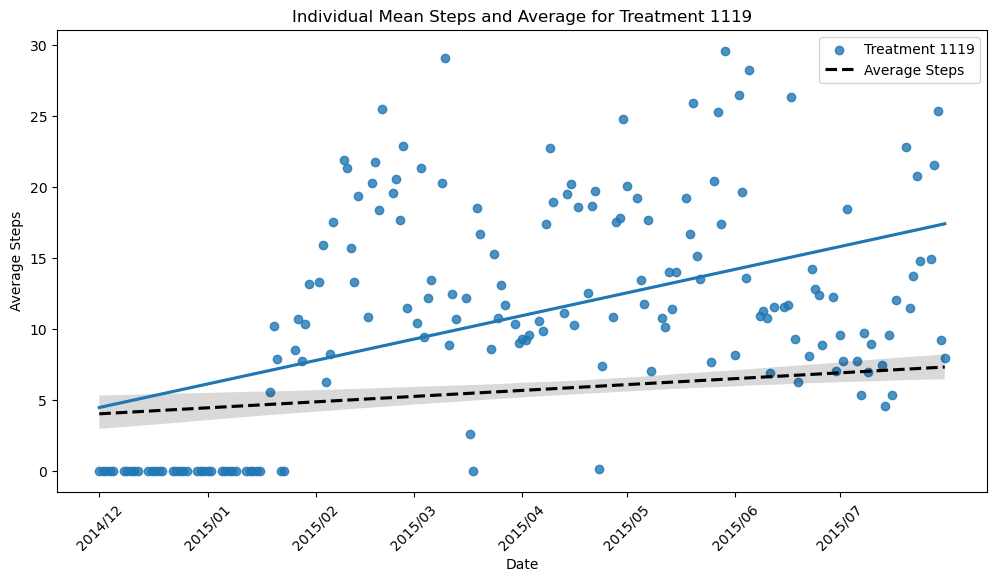

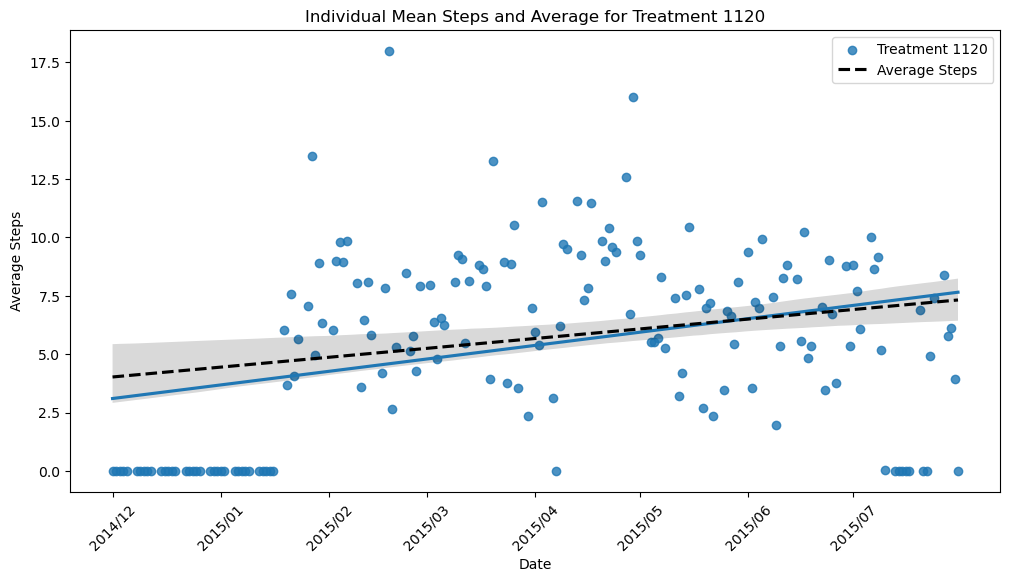

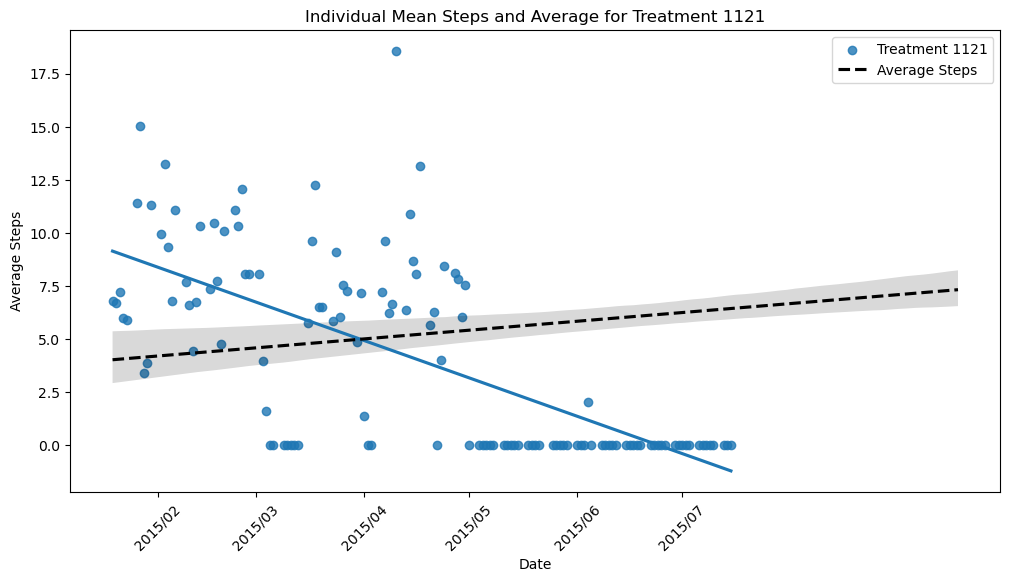

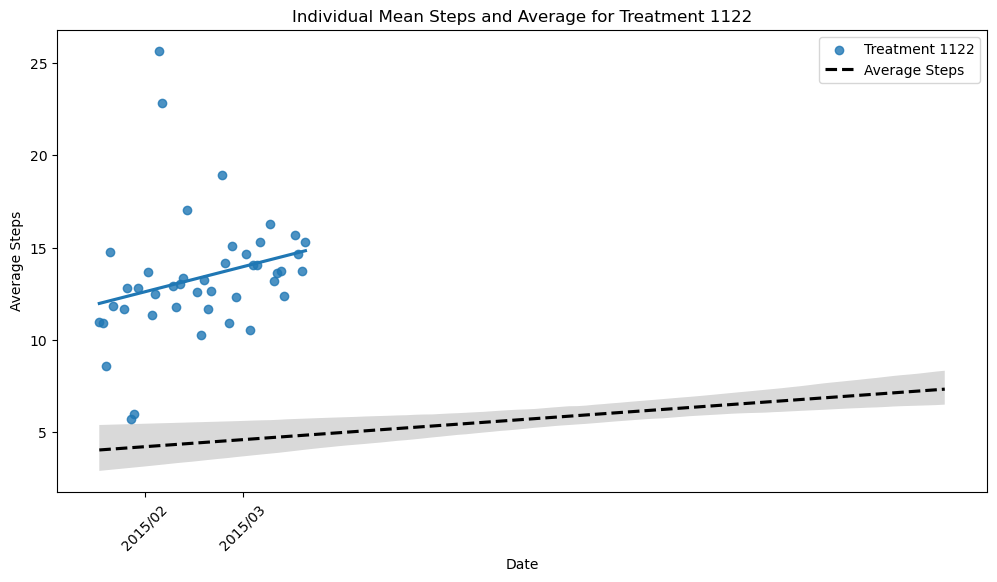

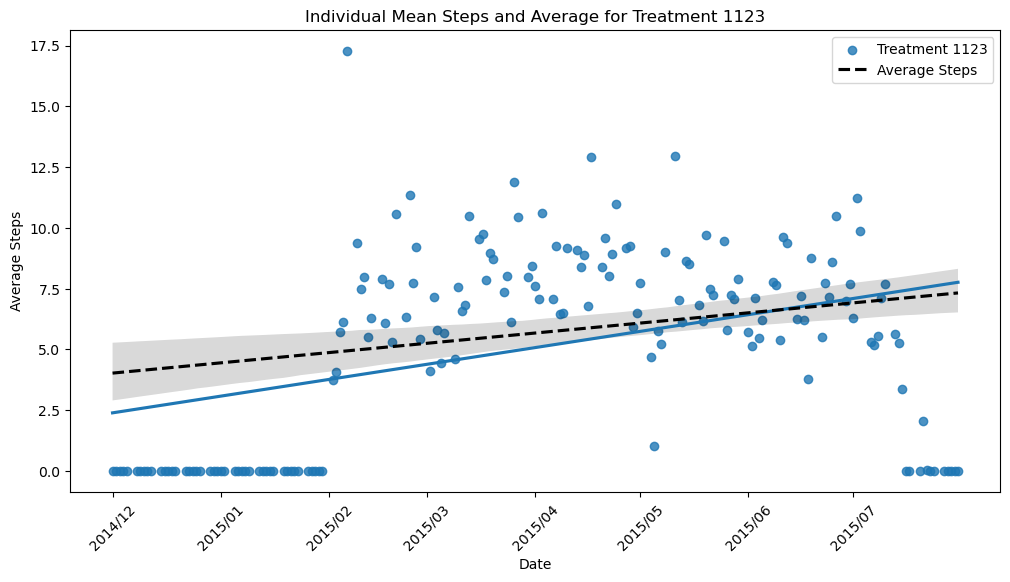

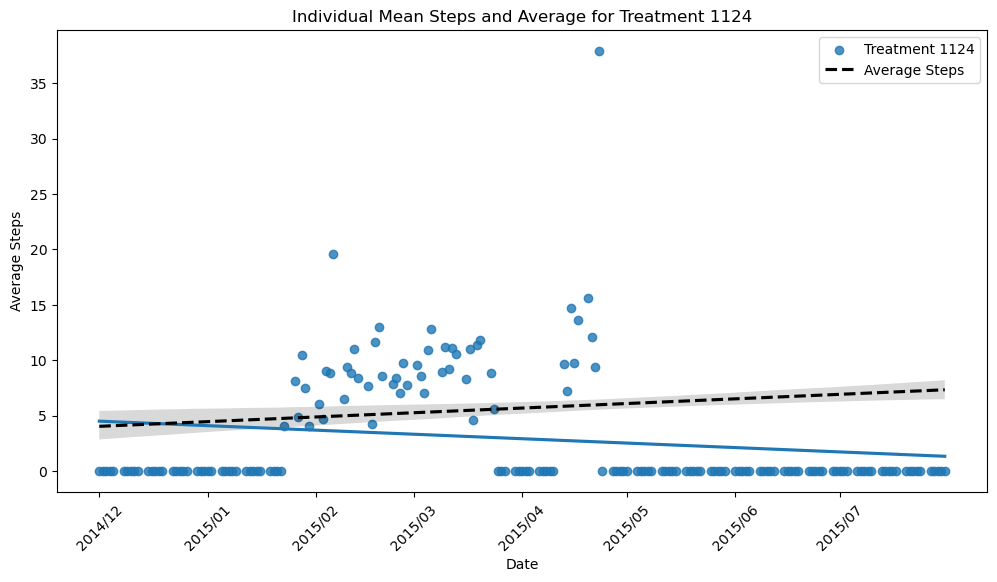

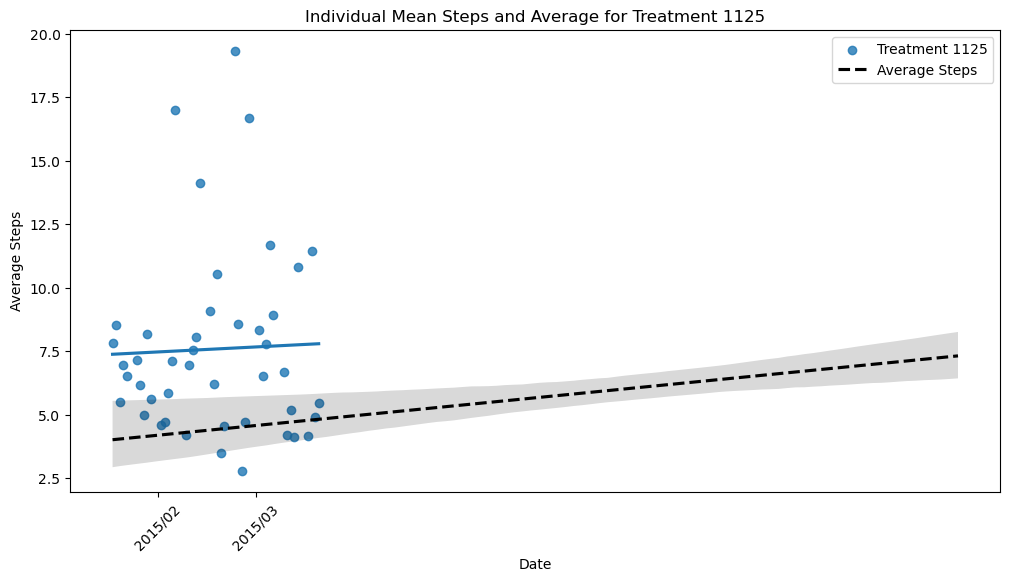

In [71]:
# -------- PLOT 3: Individual plots with average steps superposed --------

# Compute the average of all individuals' steps per day for Plot 2 (same as above)
average_steps = df.groupby([df['date'].dt.date])['steps'].mean().reset_index()

# Convert 'date' back to datetime format
average_steps['date'] = pd.to_datetime(average_steps['date'])

# Convert 'date' to numeric for regression (safe modification)
average_steps['date_numeric'] = (average_steps['date'] - average_steps['date'].min()).dt.days

# Loop through all treatment_ids for individual plots
for treatment in treatment_ids:
    plt.figure(figsize=(12, 6))
    
    # Filter data for the current treatment_id
    subset = individual_means[individual_means['treatment_id'] == treatment].copy()  # Use .copy() here
    
    # Convert 'date' to numeric for regression (safe modification)
    subset.loc[:, 'date_numeric'] = (subset['date'] - subset['date'].min()).dt.days
    
    # Plot regression for this individual
    sns.regplot(data=subset, x='date_numeric', y='steps', scatter=True, ci=None, label=f'Treatment {treatment}')
    
    # Plot the average steps for all individuals (same as Plot 2)
    sns.regplot(data=average_steps, x='date_numeric', y='steps', scatter=False, color='black', label='Average Steps', line_kws={'color': 'black', 'linestyle': '--'})
    
    # Set the x-ticks to the first day of each month (same as Plot 2)
    months = pd.date_range(start=subset['date'].min(), end=subset['date'].max(), freq='MS')  # First day of each month
    month_numeric = (months - subset['date'].min()).days  # Convert the months to numeric
    
    # Apply the same x-tick formatting as in Plot 2 (YYYY/MM format)
    plt.xticks(month_numeric, months.strftime('%Y/%m'), rotation=45)  # Format x-ticks as YYYY/MM and rotate for better readability
    
    # Formatting
    plt.title(f"Individual Mean Steps and Average for Treatment {treatment}")
    plt.xlabel("Date")
    plt.ylabel("Average Steps")
    plt.legend()
    plt.show()


In [ ]:
5.67 steps by minutes

60 minutes in 1 hour

5.67 * 60 = 340.2 steps by hour

340.2 * 24 = 8,164.8 steps by day